# What is the True Normal Human Body Temperature?

## Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?



# Exercises

In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**.

1. Is the distribution of body temperatures normal? 
    * Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

2. Is the sample size large? Are the observations independent? 
    * Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 

3. Is the true population mean really 98.6 degrees F? 
    * Would you use a one-sample or two-sample test? Why? 
    * In this situation, is it appropriate to use the t or z statistic? 
    * Now try using the other test. How is the result be different? Why?

4. Draw a small sample of size 10 from the data and repeat both tests. 
    * Which one is the correct one to use? 
    * What do you notice? What does this tell you about the difference in application of the t and z statistic? 

5. At what temperature should we consider someone's temperature to be "abnormal"? 
    * Start by computing the margin of error and confidence interval. 

6. Is there a significant difference between males and females in normal temperature? 
    * What test did you use and why? 
    * Write a story with your conclusion in the context of the original problem. 


You can include written notes in notebook cells using Markdown: 
* In the control panel at the top, choose Cell > Cell Type > Markdown
* Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

## Resources

* Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
* Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


In [44]:
import pandas as pd
df = pd.read_csv('human_body_temperature.csv')

In [45]:
# Your work here
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
len(df)

130

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import scipy

## 1. Is the distribution of body temperatures normal?

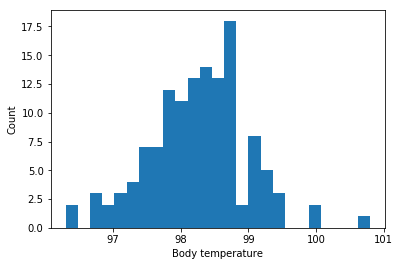

In [6]:
# distribution of temperature
plt.hist(df.temperature, bins=25)
plt.xlabel('Body temperature')
plt.ylabel('Count')
plt.show()

In [7]:
shapiro_results = scipy.stats.shapiro(df.temperature)
print(shapiro_results)
print('The Shapiro Wilks test (p-value of 0.233) does not reject the NULL Hypothesis that the data is normally distributed')

(0.9865769743919373, 0.2331680953502655)
The Shapiro Wilks test (p-value of 0.233) does not reject the NULL Hypothesis that the data is normally distributed


In [8]:
anderson_results = scipy.stats.anderson(df.temperature)
print(anderson_results)
print('The Anderson-Darling test (p-value > 0.15) does not reject the NULL Hypothesis that the data is normally distributed')

AndersonResult(statistic=0.52010388267143526, critical_values=array([ 0.56 ,  0.637,  0.765,  0.892,  1.061]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
The Anderson-Darling test (p-value > 0.15) does not reject the NULL Hypothesis that the data is normally distributed


In [9]:
dagostino_results = scipy.stats.mstats.normaltest(df.temperature)
print(dagostino_results)
print('The DAgostino Pearson test (p-value of 0.2597) does not reject the NULL Hypothesis that the data is normally distributed')

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)
The DAgostino Pearson test (p-value of 0.2597) does not reject the NULL Hypothesis that the data is normally distributed


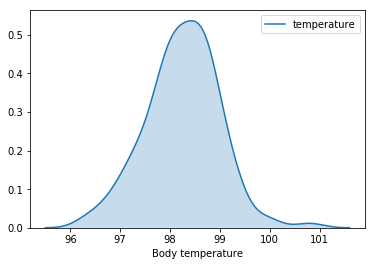

In [10]:
# distribution of temperature
sns.kdeplot(df.temperature, shade=True)
plt.xlabel('Body temperature')
plt.show()

## The above plot is a kernel density estimate plot of the body temperature data distribution

## From the Above, the body temperature data appears to be normally distributed

## 2. Is the sample size large? Are the observations independent? 

In [11]:
# Total sample size
n = len(df)
n

130

## The sample size is large enough that a z test can be used ( 130 > 30), but still the sample size is small.   The observations are independent since they come from different people.

## 3. Is the true population mean really 98.6 degrees F?

    * Would you use a one-sample or two-sample test? Why? 
    * In this situation, is it appropriate to use the t or z statistic? 
    * Now try using the other test. How is the result be different? Why?

In [12]:
# mean temperature of all samples
temperature_mean = df.temperature.sum() / n
temperature_mean

98.24923076923078

Since the sample mean is less than 98.6, use a one-sample test because the hypothesis of interest can be expressed as:
H0: mu=98.6
Ha: mu<98.6

In this situation, it is appropriate to use the z statistic because there are  130 observations, which is bigger than 30 thus making a t statistic behave like a z statistic.

In [13]:
# Sample mean
mu = temperature_mean

In [14]:
# Sample variance
df1 = (df.temperature-mu)*(df.temperature-mu)
S2 = df1.sum() / (n-1)

In [15]:
# Sample standard deviation
S = math.sqrt(S2)

In [16]:
# One standard deviation
stdev = S / math.sqrt(n)
print(stdev)

0.06430441683789101


In [17]:
# look up in Z table for 95% confidence interval, we get 
z=1.96
mu_min = mu - z * stdev
mu_max = mu + z * stdev
mu_min, mu_max

(98.12319411222852, 98.37526742623304)

In [18]:
# look up in Z table for 99% conficence interval, we get 
z=2.58
mu_min = mu - z * stdev
mu_max = mu + z * stdev
mu_min, mu_max

(98.08332537378902, 98.41513616467253)

The true population mean isn't 98.6 degrees F because both confidence intervals exclude the value 98.6 degrees F.  The 95% confidence interval is (98.123, 98.375), the 99% confidence interval is (98.083, 98.415).

Now try using the t test:

In [19]:
# look up in T table for 95% confidence interval, we get 
t=1.657
mu_min = mu - t * stdev
mu_max = mu + t * stdev
mu_min, mu_max

(98.14267835053039, 98.35578318793117)

In [20]:
# look up in T table for 99% confidence interval, we get 
t=2.356
mu_min = mu - t * stdev
mu_max = mu + t * stdev
mu_min, mu_max

(98.09772956316071, 98.40073197530084)

The true population mean isn't 98.6 degrees F because both confidence intervals exclude the value 98.6 degrees F. The 95% confidence interval is (98.143, 98.355), the 99% confidence interval is (98.097, 98.400). The result of t test has smaller range, because t test is for small sample size. 

## 4. Draw a small sample of size 10 from the data and repeat both tests. 
Which one is the correct one to use? 
What do you notice? What does this tell you about the difference in application of the t and z statistic?

In [32]:
# draw sample of size 10 from data:
np.random.seed(0)
sample10 = np.random.choice(df.temperature,size=10,replace=False)
print(sample10)

[ 98.4  97.6  98.8  97.6  98.7  98.3  99.   98.6  98.6  97.8]


In [33]:
#sample mean
mu10 = sample10.sum()/10
print(mu10)

98.34


In [34]:
#sample standard deviation
df10 = (sample10-mu10)*(sample10-mu10)
S20 = df10.sum() / (10-1)
S10 = math.sqrt(S20)
stdev10 = S10 / math.sqrt(10)
print(stdev10)

0.1600000000000005


The correct test statistic to use it the t statistic because the sample size is small ( 10 < 30).

In [35]:
# look up in Z table for 95% confidence interval, we get 
z=1.96
mu10_min = mu10 - z * stdev10
mu10_max = mu10 + z * stdev10
mu10_min, mu10_max

(98.026399999999995, 98.653600000000012)

In [29]:
# look up in Z table for 99% conficence interval, we get 
z=2.58
mu10_min = mu10 - z * stdev10
mu10_max = mu10 + z * stdev10
mu10_min, mu10_max

(97.926249481100015, 98.653750518899969)

In [30]:
# look up in T table for 95% confidence interval, we get 
t=1.657
mu10_min = mu10 - t * stdev10
mu10_max = mu10 + t * stdev10
mu10_min, mu10_max

(98.056381934179356, 98.523618065820628)

In [36]:
# look up in T table for 99% confidence interval, we get 
t=2.356
mu10_min = mu10 - t * stdev10
mu10_max = mu10 + t * stdev10
mu10_min, mu10_max

(97.963040000000007, 98.71696)

Notice that the 95% confidence interval for the t statixtic is contained inside the 95% confidence interval for the z statistic.  The 95% confidence interval for the t statistic would reject the NULL that mean human body temperature is 98.6 degrees F.  All other confidence intervals for t and z statistics can not reject the NULL that mean human body temperature is 98.6 degrees F since they all contain 98.6.  The t statistic may be more appropriate because the sample size is small.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

Using the z statistic with the entire sample of size 130, the 99% confidence interval has the true mean body temperature is between 98.08 to 98.42 degrees F. If someone's temperature is higher than 98.42 degrees F or below 98.08 degrees F, we should consider it to be "abnormal".

## 6. Is there a significant difference between males and females in normal temperature? 

What test did you use and why? 
Write a story with your conclusion in the context of the original problem. 

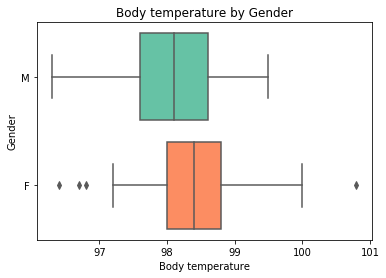

In [37]:
# Boxplot of body temperature, male and female
sns.boxplot(df.temperature, df.gender, order=["M", "F"], palette="Set2", saturation=1)
plt.ylabel('Gender')
plt.xlabel('Body temperature')
plt.title('Body temperature by Gender')
plt.show()

In [38]:
# Sample mean temperatures for males and females
mu_m = df[df.gender=='M'].temperature.sum() / len(df[df.gender=='M'])
mu_f = df[df.gender=='F'].temperature.sum() / len(df[df.gender=='F'])

In [39]:
# Sample sizes of males and females
nm = len(df[df.gender=='M'])

nf = len(df[df.gender=='F'])

In [40]:
# Sample variance for twao sample test for males and females
dfm = (df[df.gender=="M"].temperature-mu_m)*(df[df.gender=="M"].temperature-mu_m)
SS_m = dfm.sum()
dff = (df[df.gender=="F"].temperature-mu_f)*(df[df.gender=="F"].temperature-mu_f)
SS_f = dff.sum()
Sp2 = (SS_m + SS_f) / (nm - 1 + nf - 1)

In [41]:
# Standard deviation of the sample distribution of sample mean differences
stdev2 = math.sqrt(Sp2/nm + Sp2/nf)


In [42]:
# degrees of freedom for the two sample t test:
df2 = nm-1 + nf-1
print(df2)

128


In [43]:
# Check two-tailed T table with 128 for 99% confidence interval, we get 
t=2.235
mud = mu_f - mu_m
print(mud)
mud_min = mud - t * stdev2
mud_max = mud + t * stdev2
mud_min, mud_max

0.289230769230727


(0.006382690042414929, 0.5720788484190391)

From the t test result, we have 99% confidence that body temperature difference of females and males is between 0.006 and 0.572 degrees F. Since 0 is not contained in the interval, there is a  significant difference between males and females in normal temperature.

The mean normal body temperature was held to be 37 ∘ C or 98.6 ∘ F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, this value is not statistically correct due to the z statistic test above. From the test result, the 99% confidence interval for mean body temperature is between 98.08 to 98.42 degrees F. So if someone's temperature is higher than 98.42 degrees F or below 98.08 degrees F, then that should be considered "abnormal". There is a significant difference between males and females in normal temperature.